### Overview

This project is all about analysing the local temperature of Bangalore city and global temperature.The dataset used here has been provided on the Udacity portal in the form of a database.




### Goal
- Extraction of data from the database using query and export to CSV file.
- Create plots from the CSV data for the Global temperature and Bangalore's temperature.
- Compare and analyse the plots like rise in temperature,current temperatures etc.
- Record significant observations.

### Tools Used
- <font color='green'>SQL</font>:-To extract the data frome the database
- <font color='green'>Python</font>:-For calculating moving average and plotting line chart.
- <font color='green'>Jupyter Notebook</font>:-For writing code and making report.
- <font color='green'>Excel Sheets</font>:- For having a look at the data and calculating moving average.

### Process
- **STEP1:- Extraction of Data from the database**
    - To see which cities are available for the country "India"<br>
        - <font color='green'>SELECT * FROM city_list WHERE country = 'India'</font><br><br>
    - By joining the database tables(city_data and global_data) the required dataset can be achieved,but from the SCHEMA it can be seen that both the tables have a common column i.e **'avg_temp'**.So we need to change that particular column name<br>
        - <font color='green'>ALTER TABLE city_data RENAME COLUMN avg_temp to avg_temp_city;</font><br>
        - <font color='green'>ALTER TABLE global_data RENAME COLUMN avg_temp to avg_temp_global;</font><br><br>
    - Joining the tables(city_data and global_data) to achieve the required dataset<br>
        - <font color='green'>SELECT global_data.year, avg_temp_global, avg_temp_city
            FROM global_data<br>
            JOIN city_data <br>
            ON global_data.year = city_data.year<br>
            WHERE city ='Bangalore';</font><br>
  

**STEP2:- Calculating the moving average**

In [1]:
from IPython.display import Image
Image(url= "moving_avg.PNG")

- **STEP3:- Python Code to make the Line Chart**
    - First of all we <font color='green'>import all the required packages</font> such as numpy,panda,matplotlib
    - CSV is Read using the <font color='green'>read_csv()</font> method
    - The,we use <font color='green'>rolling()</font> method to calculate the moving average(I have calculated weekly moving avg.).
    - Finally,<font color='green'>plot()</font> method is used to plot the graph.

In [2]:
#Importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Bangalore.csv')  #reading the csv
df.tail(10)   #having a look at the dataset


,year,avg_temp_global,avg_temp_city
208,2004,9.32,25.25
209,2005,9.70,25.48
210,2006,9.53,25.42
211,2007,9.73,25.46
212,2008,9.43,25.35
213,2009,9.51,25.73
214,2010,9.70,25.71
215,2011,9.52,25.36
216,2012,9.51,26.04
217,2013,9.61,26.61


In [3]:
#calculating moving average for the global and local temperature data
mA_global_weekly = df.rolling(window = 7, on = "avg_temp_global").mean().dropna()
mA_local_weekly = df.rolling(window = 7, on = "avg_temp_city").mean().dropna()

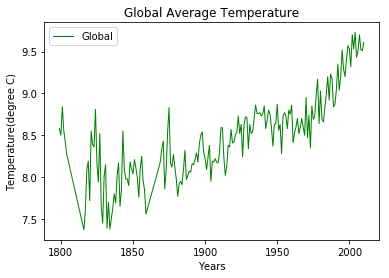

In [8]:
#Plotting the global temperature data
plt.plot(mA_global_weekly['year'], mA_global_weekly['avg_temp_global'], label = 'Global',color='green',linewidth = 1)
plt.title("Global Average Temperature")
plt.xlabel('Years')
plt.ylabel('Temperature(degree C)')
plt.legend()
plt.show()

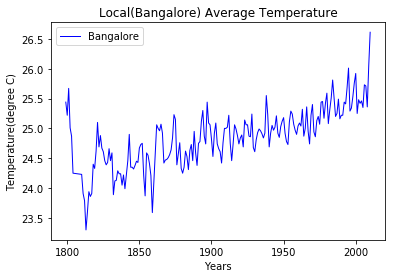

In [9]:
#Plotting the global temperature data
plt.plot(mA_local_weekly['year'], mA_local_weekly['avg_temp_city'],color='blue', label = 'Bangalore',linewidth = 1)

plt.title("Local(Bangalore) Average Temperature")
plt.xlabel('Years')
plt.ylabel('Temperature(degree C)')
plt.legend()
plt.show()

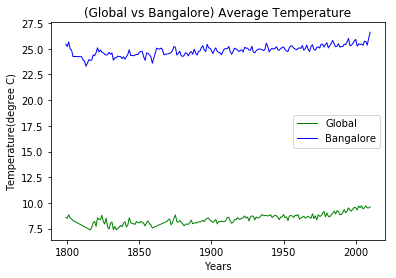

In [10]:
#Plotting the global temperature data
plt.plot(mA_global_weekly['year'], mA_global_weekly['avg_temp_global'], label = "Global",color='green',linewidth = 1)
plt.plot(mA_local_weekly['year'], mA_local_weekly['avg_temp_city'],color='blue', label = 'Bangalore',linewidth = 1)

plt.title("(Global vs Bangalore) Average Temperature")
plt.xlabel('Years')
plt.ylabel('Temperature(degree C)')
plt.legend()
plt.show()



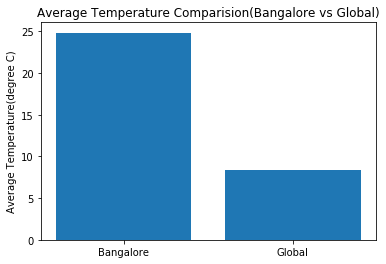

In [7]:
avg_global_temp=df['avg_temp_global'].sum()/df['avg_temp_global'].count()
avg_bangalore_temp=df['avg_temp_city'].sum()/df['avg_temp_city'].count()


objects = ('Bangalore', 'Global')
y_pos = np.arange(len(objects))
performance = [avg_bangalore_temp,avg_global_temp]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Average Temperature(degree C)')
plt.title('Average Temperature Comparision(Bangalore vs Global)')

plt.show()

In [219]:
df2=df.apply(lambda x: x.fillna(x.mean()),axis=0)  ###replacing NaN value with mean to find corelation coefficient
bangalore_temp=df2['avg_temp_city'].tolist()    
global_temp=df2['avg_temp_global'].tolist()

correlation_coeff=np.corrcoef(bangalore_temp,global_temp)
print 'correlation_coefficient=%s'%correlation_coeff[0][1]

correlation_coefficient=0.8005158504805399


## Observations
- There is steep rise in global temperature after ~1975
- The rise in Bangalore's temperature is almost      constant after ~1900
- The rise in global temperature is more as compared to rise in Bangalore's temperature after ~1950
- <font color='green'>Bangalore is hotter</font> as compared to rest of the world.
- To verify the above results I have also run the <font color='green'>df.tail(10)</font> to see the last 10 rows.
- From the above bar graph we can see that Average temperature of bangalore is much greater than global Average temperature
- <font color='green'>correlation_coefficient</font> between bangalore temperature and global temperature=0.81


### References:
- **SQL**
    - https://www.javatpoint.com/mysql-queries
    - https://www.tutorialspoint.com/sql/index.htm
- **Python**
    - https://www.tutorialspoint.com/python/index.htm
    - https://www.learnpython.org/
- **Jupyter Notebook**
    - https://jupyter.org/
    - https://jupyter-notebook.readthedocs.io/en/stable/notebook.html
- **Anaconda**
    - https://docs.anaconda.com/
    - https://docs.anaconda.com/anaconda/navigator/tutorials/